In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data= pd.read_csv("loan.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
list(raw_data.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [4]:
data= raw_data.copy()

In [6]:
data.shape     #finding the number of rows and column

(39717, 111)

In [7]:
data.isnull().sum()     #find the null values in each column

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [8]:
# drop the columns with all values as nan
data=data.dropna(axis=1, how='all', thresh=None, subset=None, inplace=False)
data.shape

(39717, 57)

In [9]:
#drop the columns which are not required for the analysis
data= data.drop(['member_id','loan_amnt','funded_amnt_inv','emp_title','issue_d','pymnt_plan','desc','purpose','title','zip_code','addr_state','earliest_cr_line','delinq_2yrs','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','initial_list_status','out_prncp_inv','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d','last_credit_pull_d', 'collections_12_mths_ex_med','policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths','delinq_amnt','pub_rec_bankruptcies','tax_liens','url'], axis = 1) 

In [10]:
data.head()

,id,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,inq_last_6mths,revol_bal,revol_util,total_acc,out_prncp,total_pymnt
0,1077501,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,27.65,1,13648,83.70%,9,0.00,5863.155187
1,1077430,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,1.00,5,1687,9.40%,4,0.00,1008.710000
2,1077175,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,8.72,2,2956,98.50%,10,0.00,3005.666844
3,1076863,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,20.00,1,5598,21%,37,0.00,12231.890000
4,1075358,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,17.94,0,27783,53.90%,38,524.06,3513.330000


In [11]:
data.shape

(39717, 19)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


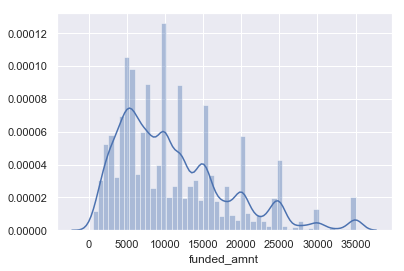

In [12]:
#dist plot to find any outlier in funded amount
sns.distplot(data['funded_amnt'])
plt.show()

In [13]:
#remove data from top 0.05 quantile
q = data['funded_amnt'].quantile(0.95)
data= data[data['funded_amnt']<q]

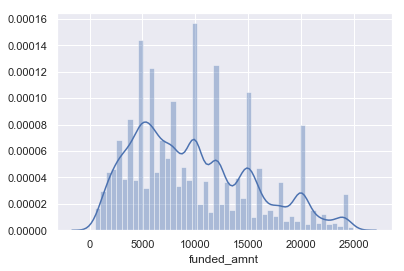

In [14]:
#dist plot after removing outliers
sns.distplot(data['funded_amnt'])
plt.show()

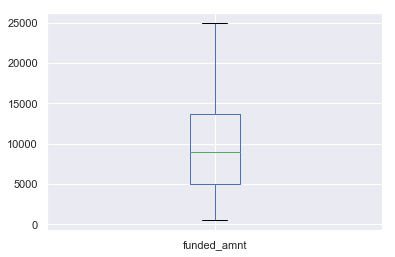

In [15]:
# box plot to find if any outlier still exist
data.boxplot(column=['funded_amnt'])
plt.show()

In [17]:
data['int_rate'] = data['int_rate'].map(lambda x: x.rstrip('%'))   # remove '%' from int_rate column

In [18]:
data['int_rate'] = data['int_rate'].astype(float) # change data type of int_rate column to float

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


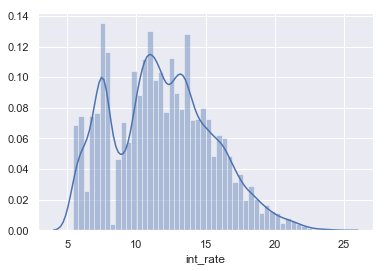

In [19]:
# distplot for int_rate
sns.distplot(data['int_rate'])
plt.show()

In [20]:
data['term'] = data['term'].map(lambda x: x.rstrip('months')) # remove 'months' from int_rate column

In [21]:
data['revol_util']=data['revol_util'].astype(str)

In [22]:
data['revol_util']= data['revol_util'].map(lambda x: x.rstrip('%')) # remove '%' from int_rate column

In [23]:
data.head()

,id,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,inq_last_6mths,revol_bal,revol_util,total_acc,out_prncp,total_pymnt
0,1077501,5000,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,27.65,1,13648,83.70,9,0.00,5863.155187
1,1077430,2500,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,1.00,5,1687,9.40,4,0.00,1008.710000
2,1077175,2400,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,8.72,2,2956,98.50,10,0.00,3005.666844
3,1076863,10000,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,20.00,1,5598,21,37,0.00,12231.890000
4,1075358,3000,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,17.94,0,27783,53.90,38,524.06,3513.330000


In [24]:
data.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'E5', 'F1', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [25]:
charged_off_data=data[data['loan_status']=='Charged Off']  #retrieve charged off data from overall data

In [26]:
data.shape

(37173, 19)

In [27]:
charged_off_data.shape  # no of rows and columns in charged_off_data

(5154, 19)

# UNIVARIATE RELATIONS

[]

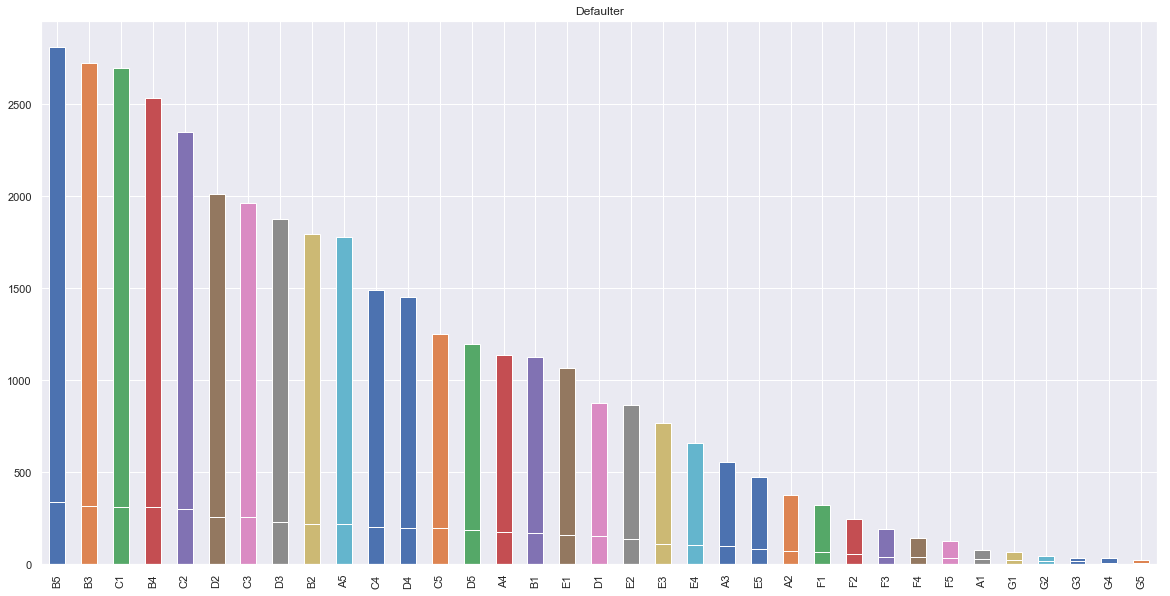

In [29]:
data.sub_grade.value_counts().plot.bar(title= 'Defaulter', figsize= (20,10))
charged_off_data.sub_grade.value_counts().plot.bar(title= 'Defaulter',figsize= (20,10))
plt.plot()

#### Most of the defaulters are from Grade B & C. However number of defaulters in geade A is lesser, catagory G being among the least. One of the reasons for less number of defaulters in G might be lesser  number of loan sanctions.

[]

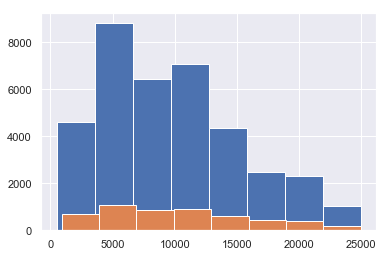

In [30]:
plt.hist(data['funded_amnt'].astype(int), bins=8)
plt.hist(charged_off_data['funded_amnt'], bins=8)
plt.plot()

#### The histogram shows funded amount for total data in blue color and charged off data in orange color. We can infer from histogram that maximum number of defautler are the people who take loans from 5000 to 15000 rupees.

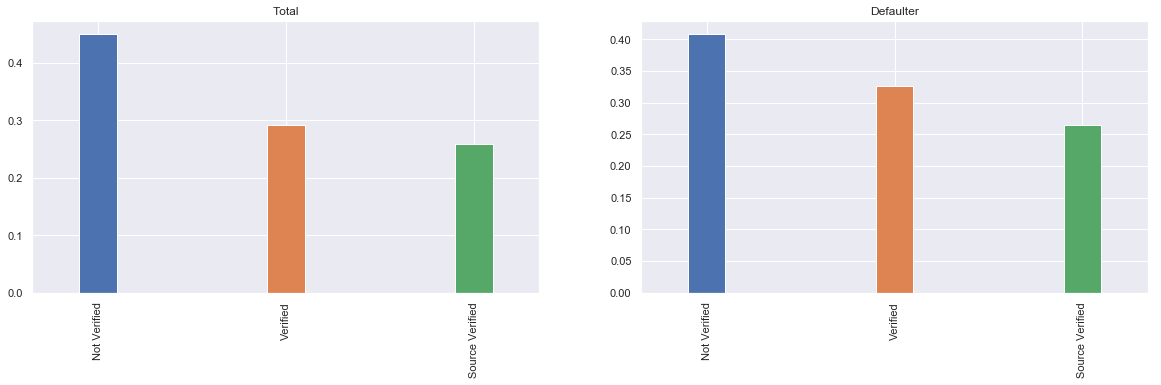

In [31]:
plt.subplot(121) 
data['verification_status'].value_counts(normalize=True).plot.bar(figsize=(20,5), width=.2, title= 'Total') 
plt.subplot(122) 
charged_off_data['verification_status'].value_counts(normalize=True).plot.bar(figsize=(20,5), width=.2,title= 'Defaulter') 
plt.show()

#### The bar graph shows the percentage of loans for which income source verification was done. This graph indicates that %50 of total loans were sanctioned without source verification out of which 40% of them were charged off.

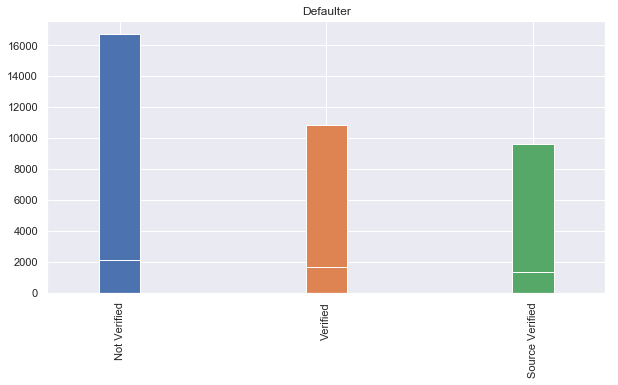

In [32]:
data['verification_status'].value_counts().plot.bar(figsize=(10,5), width=.2,title= 'Defaulter') 
charged_off_data['verification_status'].value_counts().plot.bar(figsize=(10,5), width=.2,title= 'Defaulter') 
plt.show()

#### As we can see from the above figure that number of Non-verified and verified defaulters consists of 73% of total defaulters.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


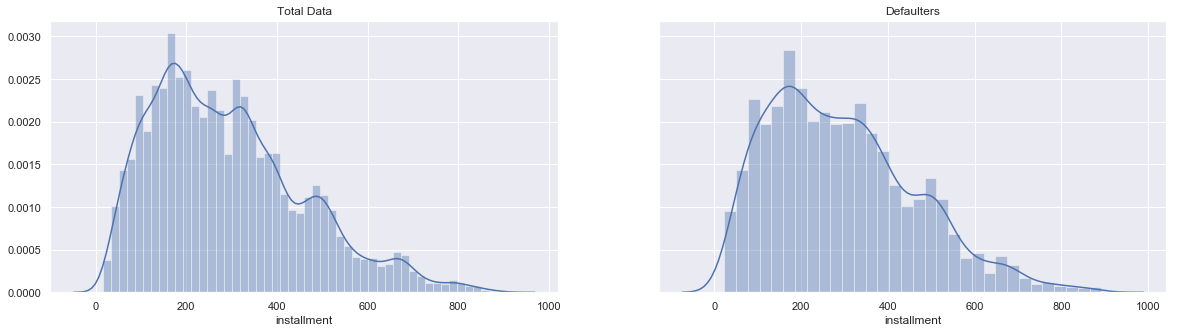

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20,5))
sns.distplot(data['installment'], ax=ax1)
ax1.set_title('Total Data')
sns.distplot(charged_off_data['installment'], ax=ax2)
ax2.set_title('Defaulters')
plt.show()

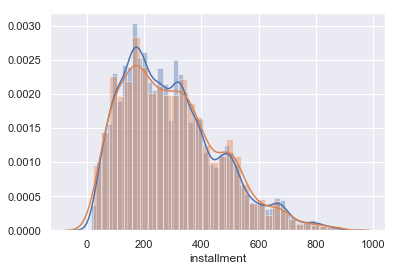

In [34]:
sns.distplot(data['installment'])
sns.distplot(charged_off_data['installment'])
plt.show()

####  From analyzing above graph, we get the insight that maximum number of defautler are the people who pay installement amount between 100 to 400 rupees.

In [35]:
charged_off_data['term']=charged_off_data['term'].values.astype('int64')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
charged_off_data.term.values

array([60, 60, 60, ..., 36, 36, 36], dtype=int64)

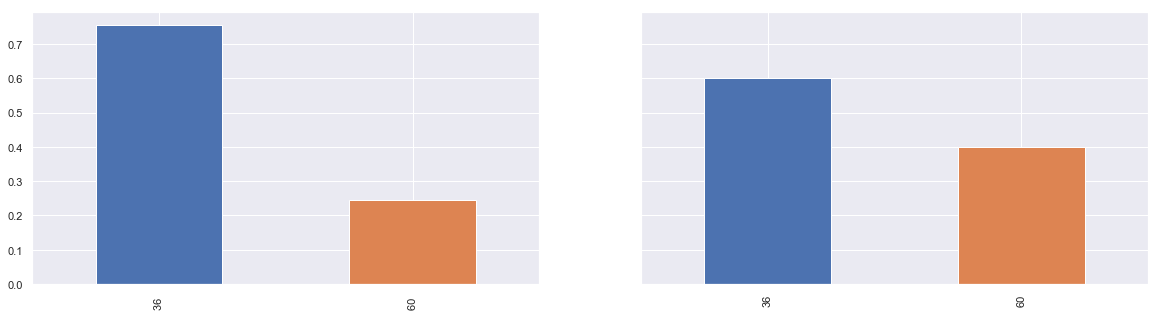

In [37]:
fig2, (ax3,ax4)= plt.subplots(1,2, sharey=True, figsize=(20,5) )
data['term'].value_counts(normalize=True).sort_index().plot.bar(ax=ax3)
charged_off_data['term'].value_counts(normalize=True).sort_index().plot.bar(ax= ax4)
plt.show()

#### Nearly 75% people takes 36 month and 25% takes 60 months tenure loan but only 60% people are defaulter from 36 month and 40% defaulters are from 60 months. Nearly 11.8% defaulter comes under 36 months loan tenure  & 23% dafaulters comes under 60 months loan tenure.

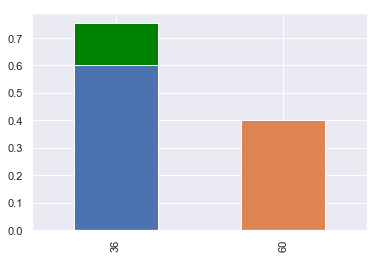

In [38]:
data['term'].value_counts(normalize=True).sort_index().plot.bar(color='green')
charged_off_data['term'].value_counts(normalize=True).sort_index().plot.bar()
plt.show()

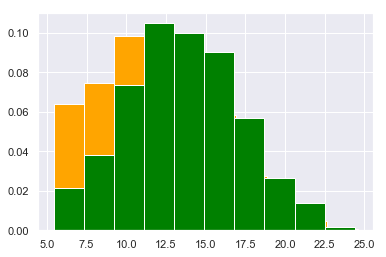

In [39]:
plt.hist(data.int_rate, bins=10,density= True, color= 'orange')
plt.hist(charged_off_data.int_rate, bins=10, density= True, color='green')
plt.show()

#### Interest rates between 5% to 10% have comparatively lesser number of defaulters. Less interest rate is better.

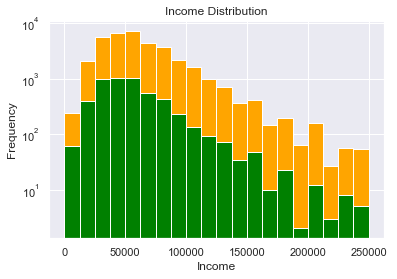

In [40]:
data.annual_inc.plot.hist(bins=20, range=(0,250000),  color='orange', log=True, title='Income Distribution')
charged_off_data.annual_inc.plot.hist(bins=20, range=(0,250000),  color='green', log=True, title='Income Distribution')
plt.xlabel('Income')
plt.show()

#### From the above figure we get that maximum number of defaulters comes in the catagory where annual income is between 10000 to 100000.

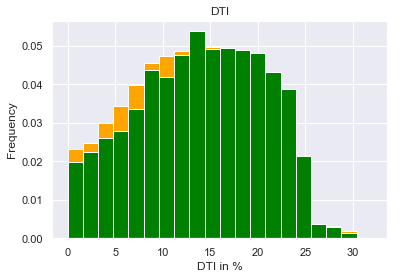

In [41]:
data.dti.plot.hist(bins=20, range=(0,32),  color='orange', log=False, title='DTI', density= True)
charged_off_data.dti.plot.hist(bins=20, range=(0,32),  color='green', log=False, title='DTI', density= True)
plt.xlabel('DTI in %')
plt.show()

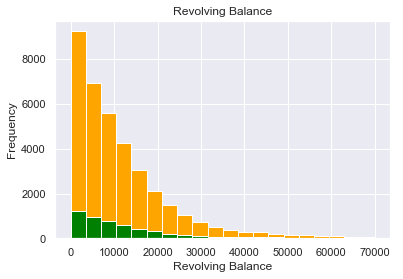

In [42]:
data.revol_bal.plot.hist(bins=20, range =(0,70000), color='orange', log=False, title='Revolving Balance',density= False)
charged_off_data.revol_bal.plot.hist(bins=20, range =(0,70000), color='green', log=False, title='Revolving Balance',density= False)
plt.xlabel('Revolving Balance')
plt.show()

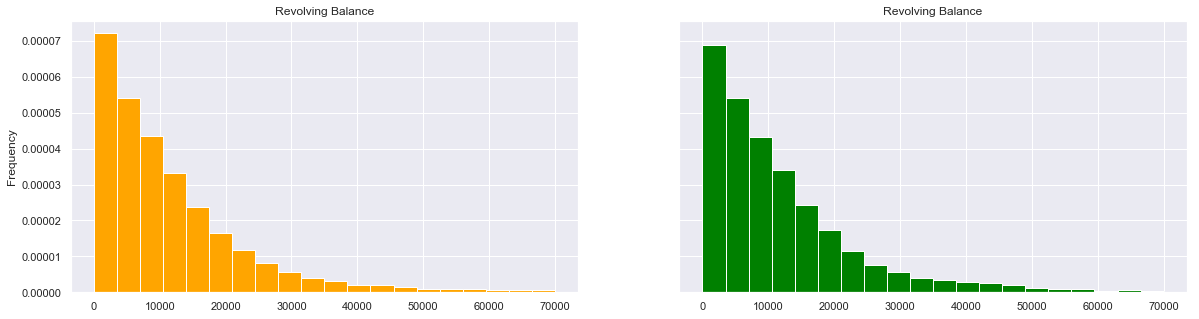

In [43]:
f,(ax5,ax6)= plt.subplots(1,2,sharey= True, figsize=(20,5))
data.revol_bal.plot.hist(bins=20, range =(0,70000), color='orange', log=False, title='Revolving Balance',density= True, ax=ax5)
charged_off_data.revol_bal.plot.hist(bins=20, range =(0,70000), color='green', log=False, title='Revolving Balance',density= True, ax=ax6)


In [44]:
data['emp_length']=data['emp_length'].astype(str)

In [45]:
charged_off_data['emp_length'].fillna(0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [46]:
emp_length=list(charged_off_data.emp_length.values)

In [47]:
for i in range(len(emp_length)):
    if emp_length[i]==0:
        continue
    elif '<' in emp_length[i]:
        emp_length[i]=0
    elif '+' in emp_length[i]:
        emp_length[i]=10
    else:
        emp_length[i]=int(emp_length[i].split()[0])

In [48]:
charged_off_data['emp_length']=emp_length

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
charged_off_data.head()

,id,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,inq_last_6mths,revol_bal,revol_util,total_acc,out_prncp,total_pymnt
1,1077430,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Charged Off,1.00,5,1687,9.40,4,0.0,1008.71
8,1071795,5600,60,21.28,152.39,F,F2,4,OWN,40000.0,Source Verified,Charged Off,5.55,2,5210,32.60,13,0.0,646.02
9,1071570,5375,60,12.69,121.45,B,B5,0,RENT,15000.0,Verified,Charged Off,18.08,0,9279,36.50,3,0.0,1476.19
12,1064687,9000,36,13.49,305.38,C,C1,0,RENT,30000.0,Source Verified,Charged Off,10.08,1,10452,91.70,9,0.0,2270.70
14,1069057,10000,36,10.65,325.74,B,B2,3,RENT,100000.0,Source Verified,Charged Off,7.06,2,11997,55.50,29,0.0,7471.99


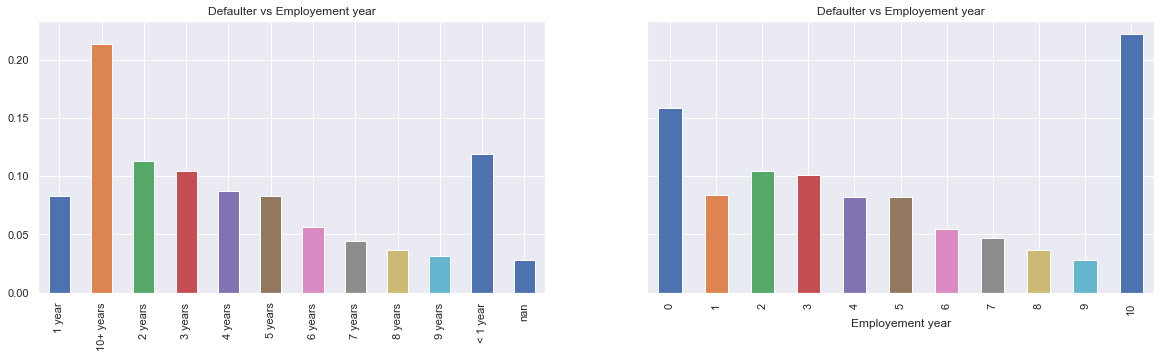

In [50]:
f,(ax7,ax8)= plt.subplots(1,2,sharey= True, figsize=(20,5))
data.emp_length.value_counts(normalize=True).sort_index().plot.bar(title='Defaulter vs Employement year', ax=ax7)
charged_off_data.emp_length.value_counts(normalize=True).sort_index().plot.bar(title='Defaulter vs Employement year', ax=ax8)
plt.xlabel('Employement year')
plt.ylabel('Number of Defaulters')
plt.show()

#### According to above plot we can see that people who are employed for more than 10 years and for less than a year comprises of maximum number of defaulters.

# BIVARIATE RELATIONS

In [51]:
data.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 'nan'],
      dtype=object)

In [52]:
data['emp_length'].replace('nan', np.nan, inplace=True)

In [53]:
data.emp_length.isnull().sum()

1038

In [54]:
 data.dropna(subset=['emp_length'],inplace=True)

In [55]:
# data['emp_length'].dropna(axis=0,how='any', inplace=True)

In [56]:
data.emp_length.isnull().sum()

0

In [58]:
emp_length=list(data.emp_length.values)

In [59]:
for i in range(len(emp_length)):
    if emp_length[i]==0:
        continue
    elif '<' in emp_length[i]:
        emp_length[i]=0
    elif '+' in emp_length[i]:
        emp_length[i]=10
    else:
        emp_length[i]= int(emp_length[i].split()[0])

In [60]:
data.sort_index(inplace=True)

In [61]:
data['emp_length']= emp_length

In [62]:
data.head()

,id,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,inq_last_6mths,revol_bal,revol_util,total_acc,out_prncp,total_pymnt
0,1077501,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,27.65,1,13648,83.70,9,0.00,5863.155187
1,1077430,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Charged Off,1.00,5,1687,9.40,4,0.00,1008.710000
2,1077175,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,8.72,2,2956,98.50,10,0.00,3005.666844
3,1076863,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,20.00,1,5598,21,37,0.00,12231.890000
4,1075358,3000,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Current,17.94,0,27783,53.90,38,524.06,3513.330000


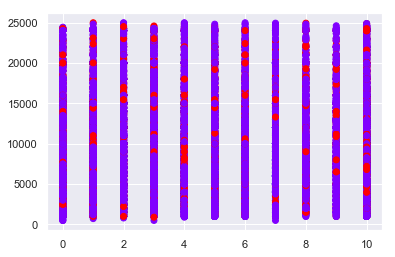

In [109]:
plt.scatter(data['emp_length'],data['funded_amnt'], c= data['loan_status'].map({'Fully Paid':0, 'Current':0,'Charged Off': 1}),cmap='rainbow' )
plt.show()

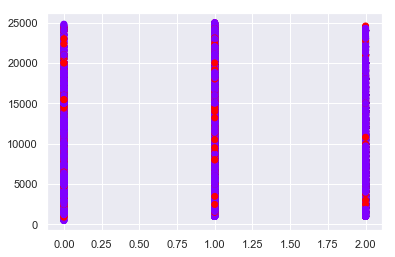

In [110]:
plt.scatter(data['verification_status'].map({'Not Verified':0, 'Verified':1,'Source Verified':2 }),data['funded_amnt'], c= data['loan_status'].map({'Fully Paid':0, 'Current':0,'Charged Off': 1}),cmap='rainbow' )
plt.show()

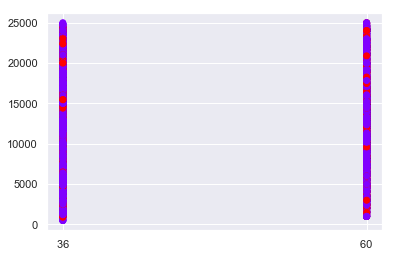

In [111]:
plt.scatter(data['term'],data['funded_amnt'], c= data['loan_status'].map({'Fully Paid':0, 'Current':0,'Charged Off': 1}),cmap='rainbow' )
plt.show()

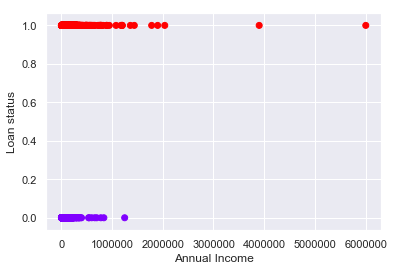

In [66]:
plt.scatter(data['annual_inc'], data['loan_status'].map({'Fully Paid':1, 'Current':1,'Charged Off': 0}), c=data['loan_status'].map({'Fully Paid':1, 'Current':1,'Charged Off': 0}), cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Loan status')
plt.show()

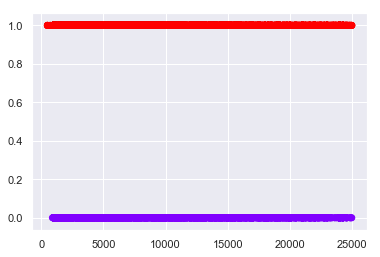

In [112]:
plt.scatter(data['funded_amnt'], data['loan_status'].map({'Fully Paid':1, 'Current':1,'Charged Off': 0}), c=data['loan_status'].map({'Fully Paid':1, 'Current':1,'Charged Off': 0}), cmap='rainbow')

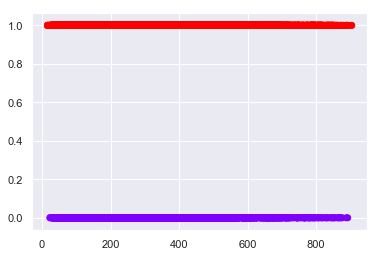

In [114]:
plt.scatter(data['installment'], data['loan_status'].map({'Fully Paid':1, 'Current':1,'Charged Off': 0}), c=data['loan_status'].map({'Fully Paid':1, 'Current':1,'Charged Off': 0}), cmap='rainbow')

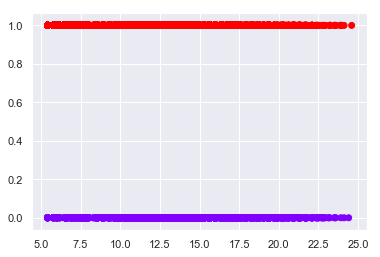

In [69]:
 plt.scatter(data['int_rate'], data['loan_status'].map({'Fully Paid':1, 'Current':1,'Charged Off': 0}), c=data['loan_status'].map({'Fully Paid':1, 'Current':1,'Charged Off': 0}), cmap='rainbow')

## From the above relations we get that our target is Loan Status and important variables are
#### funded_amnt, term, 	int_rate, sub_grade,	emp_length,	annual_inc,	verification_status and dti

In [70]:
data.head()

,id,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,inq_last_6mths,revol_bal,revol_util,total_acc,out_prncp,total_pymnt
0,1077501,5000,36,10.65,162.87,B,B2,10,RENT,24000.0,Verified,Fully Paid,27.65,1,13648,83.70,9,0.00,5863.155187
1,1077430,2500,60,15.27,59.83,C,C4,0,RENT,30000.0,Source Verified,Charged Off,1.00,5,1687,9.40,4,0.00,1008.710000
2,1077175,2400,36,15.96,84.33,C,C5,10,RENT,12252.0,Not Verified,Fully Paid,8.72,2,2956,98.50,10,0.00,3005.666844
3,1076863,10000,36,13.49,339.31,C,C1,10,RENT,49200.0,Source Verified,Fully Paid,20.00,1,5598,21,37,0.00,12231.890000
4,1075358,3000,60,12.69,67.79,B,B5,1,RENT,80000.0,Source Verified,Current,17.94,0,27783,53.90,38,524.06,3513.330000


In [71]:
x=data[['funded_amnt','term', 'int_rate', 'sub_grade', 'emp_length', 'annual_inc', 'verification_status','dti']]

In [72]:
y= data['loan_status'].map({'Fully Paid':1, 'Charged Off':0, 'Current':1}).astype('int')

In [73]:
x.head()

,funded_amnt,term,int_rate,sub_grade,emp_length,annual_inc,verification_status,dti
0,5000,36,10.65,B2,10,24000.0,Verified,27.65
1,2500,60,15.27,C4,0,30000.0,Source Verified,1.00
2,2400,36,15.96,C5,10,12252.0,Not Verified,8.72
3,10000,36,13.49,C1,10,49200.0,Source Verified,20.00
4,3000,60,12.69,B5,1,80000.0,Source Verified,17.94


In [74]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int32

## Multicollinearity

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x[['funded_amnt','term', 'int_rate','emp_length', 'annual_inc','dti']].astype('int')
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [76]:
vif

,VIF,Features
0,0.001084,funded_amnt
1,15.404007,term
2,12.100914,int_rate
3,2.913099,emp_length
4,-0.000003,annual_inc
5,4.374559,dti


In [77]:
x = x.drop(['term'],axis=1)

In [78]:
variables = x[['funded_amnt', 'int_rate','emp_length', 'annual_inc','dti']].astype('int')
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [79]:
vif

,VIF,Features
0,0.001017,funded_amnt
1,6.355467,int_rate
2,2.751895,emp_length
3,-0.000003,annual_inc
4,4.089848,dti


## As the value of vif is not more than 7 we can go with the data for prediction safely.

In [80]:
data_with_dummies = pd.get_dummies(x, drop_first=True)

In [81]:
data_with_dummies.head()

,funded_amnt,int_rate,emp_length,annual_inc,dti,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,...,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified
0,5000,10.65,10,24000.0,27.65,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2500,15.27,0,30000.0,1.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2400,15.96,10,12252.0,8.72,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10000,13.49,10,49200.0,20.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,3000,12.69,1,80000.0,17.94,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [82]:
data_with_dummies.columns.values

array(['funded_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti',
       'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4',
       'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3',
       'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2',
       'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1',
       'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5',
       'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4',
       'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3',
       'sub_grade_G4', 'sub_grade_G5',
       'verification_status_Source Verified',
       'verification_status_Verified'], dtype=object)

In [83]:
variables = data_with_dummies[['funded_amnt', 'int_rate', 'emp_length', 'annual_inc', 'dti','sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3','sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2','sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1','sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5','sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4','sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3','sub_grade_G4', 'sub_grade_G5','verification_status_Source Verified','verification_status_Verified']].astype('int')
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [84]:
vif

,VIF,Features
0,0.001165,funded_amnt
1,98.994239,int_rate
2,2.959180,emp_length
3,-0.000003,annual_inc
4,4.763595,dti
5,1.817755,sub_grade_A2
6,2.352525,sub_grade_A3
7,3.429377,sub_grade_A4
8,3.565377,sub_grade_A5
9,3.546028,sub_grade_B1


In [85]:
data_with_dummies.drop('int_rate', axis=1, inplace= True)

In [86]:
variables = data_with_dummies[['funded_amnt','emp_length', 'annual_inc', 'dti','sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3','sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2','sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1','sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5','sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4','sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2', 'sub_grade_G3','sub_grade_G4', 'sub_grade_G5','verification_status_Source Verified','verification_status_Verified']].astype('int')
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns

In [87]:
vif

,VIF,Features
0,0.001148,funded_amnt
1,2.877517,emp_length
2,-0.000003,annual_inc
3,4.633008,dti
4,1.241306,sub_grade_A2
5,1.295399,sub_grade_A3
6,1.507747,sub_grade_A4
7,1.504369,sub_grade_A5
8,1.336718,sub_grade_B1
9,1.394040,sub_grade_B2


## Now our data is ready for model testing

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test= train_test_split(data_with_dummies, y, test_size=0.2, random_state=42)

## Standardization

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
sc_x= StandardScaler()

In [92]:
sc_x.fit(x_train.values)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [93]:
sc_x.transform(x_train.values, x_test.values )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:745: DeprecationWarning: The parameter y on transform() is deprecated since 0.19 and will be removed in 0.21
  DeprecationWarning)


array([[-1.12648871, -1.38442045, -0.5661464 , ..., -0.02353267,
         1.68615741, -0.63457714],
       [ 1.27689399,  1.44284753,  1.14994414, ..., -0.02353267,
         1.68615741, -0.63457714],
       [-0.50107314, -0.25351326, -0.42573899, ..., -0.02353267,
        -0.59306444, -0.63457714],
       ...,
       [ 0.74975801, -1.38442045, -0.14492418, ..., -0.02353267,
         1.68615741, -0.63457714],
       [ 1.82189898, -0.81896686, -0.17612582, ..., -0.02353267,
        -0.59306444,  1.57585254],
       [ 0.03499735, -0.25351326, -0.48814229, ..., -0.02353267,
         1.68615741, -0.63457714]])

# Model Testing

### Logistic Regression

In [94]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [95]:
y_pred_logistic = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_logistic)


In [96]:
y_pred_logistic

array([1, 1, 1, ..., 1, 1, 1])

In [97]:
cm

array([[   0,  967],
       [   0, 6260]], dtype=int64)

In [98]:
1-967/6260

0.8455271565495208

In [99]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_logistic))

0.8661962086619621


## Accuracy of the model is near 85%

## Random Forest model

In [100]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [101]:
y_pred_rf = regressor.predict(x_test)

In [102]:
y_pred_rf

array([0.9, 0.8, 0.8, ..., 0.9, 0.9, 0.7])

In [103]:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)
# cm

In [104]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred_knn = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
cm


array([[  31,  936],
       [ 141, 6119]], dtype=int64)

In [105]:
1-(141+ 936)/(6119+ 31)

0.8248780487804879

In [106]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_knn))

0.8509755085097551


## Accuracy is around 84%

In [107]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred_gu = classifier.predict(x_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gu)
cm


array([[   0,  967],
       [   0, 6260]], dtype=int64)

In [108]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred_gu))

0.8661962086619621


# Accuracy 87%